# Life Expectancy and GDP Data Visual Analysis Project:

Using data provided from the World Bank and the World Health Organization (WHO), an visual analysis of six countries (Chile, China, Germany, United States, Mexico, and Zimbabwe) will be done.
The project will be split into multple phases, as outlined below:

- Exploratory Phase (data cleanup, basic statistics and visualizations)

- Two-variable visualizations

- Three-variable visualizations

- Conclusions 

Before starting the project, I will state that I my expectations coming in is to find the greater the GDP of a country will be correlated with the life expectancy of its citizens.

## Import Libraries
Pandas, matplotlib, and seaborn will be used as libraries for this project. They are interlocked and related, so integration with the data available will be seamless. This aligns with the objectives that are required from this project, as stated above.

In [727]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Cursory Inspection
First steps, as with most data analysis, is usually to load in the data and inspect it. From here, I can see a sliver of my total dataframe. 

In [728]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,LEBY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


I can also see the unique countries and years that will be present in the dataset

In [729]:
print(df["Country"].unique())
print(df["Year"].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Cleanup Data:
The problem here is that the third column (Life expectancy at birth (years)) is unwieldy in its length. I will shorten it and rename it to its abbreviation: LEBY

In [730]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LEBY'})
df.to_csv('all_data.csv', index=False)

df.head()

,Country,Year,LEBY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


By looking at the means GDP and Life Expectancy of the six countries, we can get some idea about how the data will look. Since the mean and median are not equal, the data does not appear to be normal.

In [731]:
print("Mean of GDP from 2000 of 2015 of the six countries: $" + str(df["GDP"].mean()) + " Trillions US Dollars")
print("Median of GDP from 2000 of 2015 of the six countries: $" + str(df["GDP"].median()) + " Trillions US Dollars")

print(str(df["LEBY"].mean()) + " years [Mean]")
print(str(df["LEBY"].median()) + " years [Median]")

Mean of GDP from 2000 of 2015 of the six countries: $3880498570768.396 Trillions US Dollars
Median of GDP from 2000 of 2015 of the six countries: $1280220000000.0 Trillions US Dollars
72.78958333333334 years [Mean]
76.75 years [Median]


## Plotting one-variable visuals

Looking at GDP against count, we see that historgram skews rights which shows that the mean is greater than the median (like the above finds). Since the majority of countries are within a certain GDP range that is well below that of an outlier country- country x for now. We will examine who that is when we move on to the two-variable visuals. 

Text(0.5, 1.0, 'Count Against GDP')

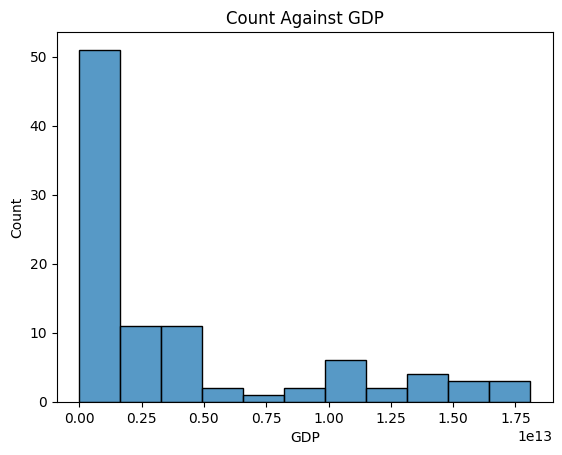

In [732]:
sns.histplot(data=df, x="GDP")
plt.title("Count Against GDP")

Plotting against life expectancy, we witness the plot is skewed left, suggesting the median is greater than the mean. This suggests that a sizable amount of countries (perhaps the plurality) share a life expectany range between 70-80, while a minority of countries share a relativley low life expectancy equal to or below 60. 

Text(0.5, 0, 'Life Expectancy at Birth (in years)')

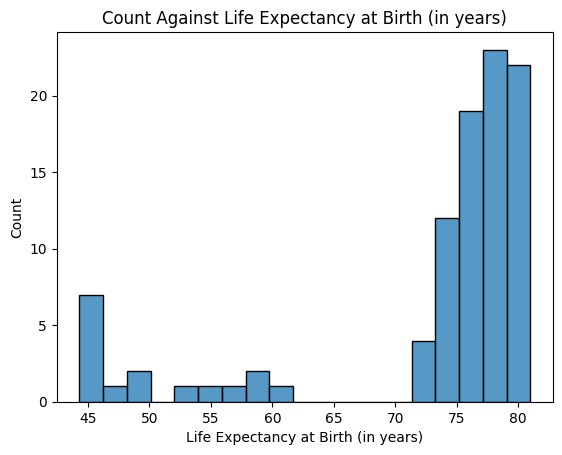

In [733]:
sns.histplot(data=df, x="LEBY")
plt.title("Count Against Life Expectancy at Birth (in years)")
plt.xlabel("Life Expectancy at Birth (in years)")

# Two-Variable Visualizations
I will first start out with creating 6 lineplots that showcase each country's relationship with GDP over time. We see that the y-axis has been normalized, which let's us witness the trends of GDP growth that each country has taken in. Overall, it seems that the trend has generally been towards positive growth over time. 

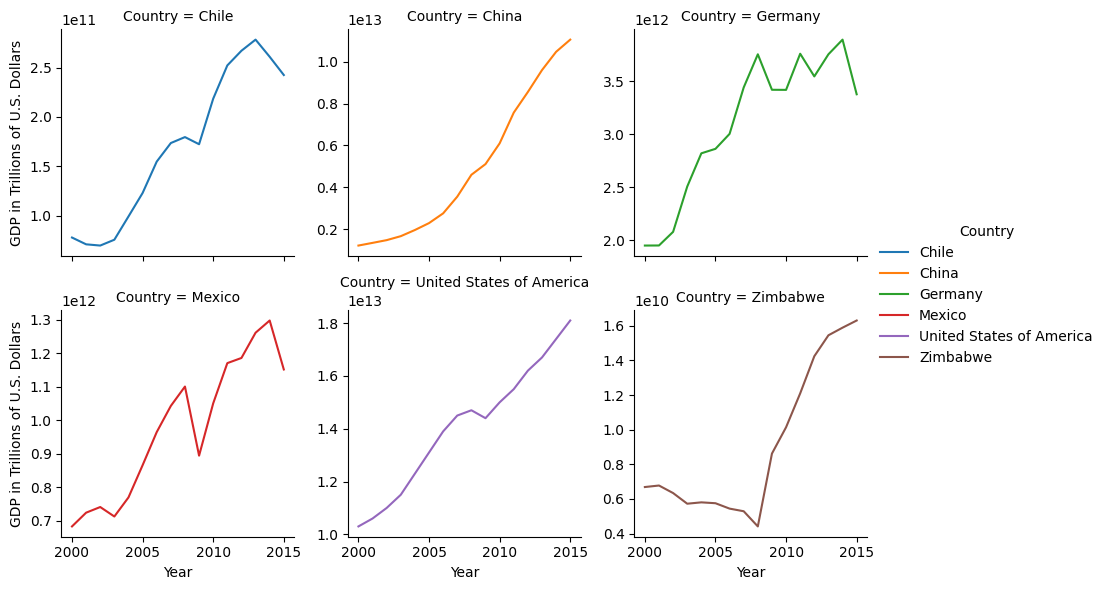

In [734]:

graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)


graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))






## Life Expectancy Against Time 
From these plots below, we can see the trend of life expectancy for several countries. These too have been normalized, and generally showcase a similiar positive trend of an upward growth of life expectancy as time moves forward. Interestingly, the minor drops of life expectancy at birth seems to roughly correlate with drops in GDP during economic downturns as showcased in the plot above. We will examine this further when we look at three-variable scatterplots

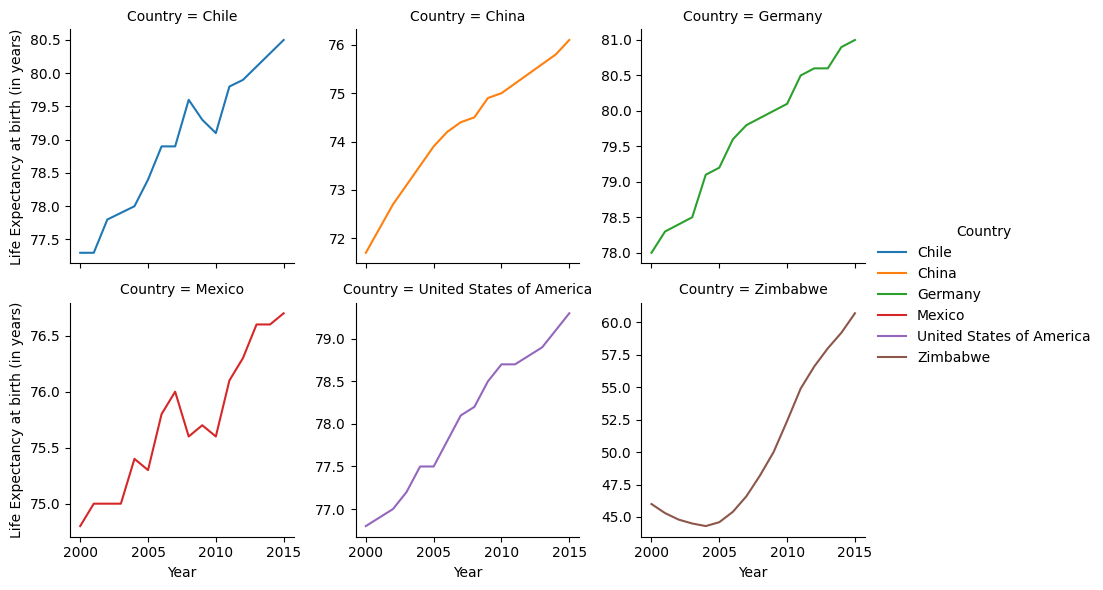

In [735]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)


graphGDP = (graphGDP.map(sns.lineplot,"Year","LEBY")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy at birth (in years)"))



## Barplots
Next, we will employ the use of barplots to help visualize the relative numerical differenced between countries in both aspect (life expectancy and GDP) so we can get a better idea of the differences and compare each state

In this first barplot, we witness that the United States pulls ahead with the greatest relative average GDP (pulled from the years 2000 to 2015), with China, Germany, Mexico, Chile, and Zimbabwe following, in that order. 

Text(0.5, 1.0, 'Mean (average) GDP Against Country')

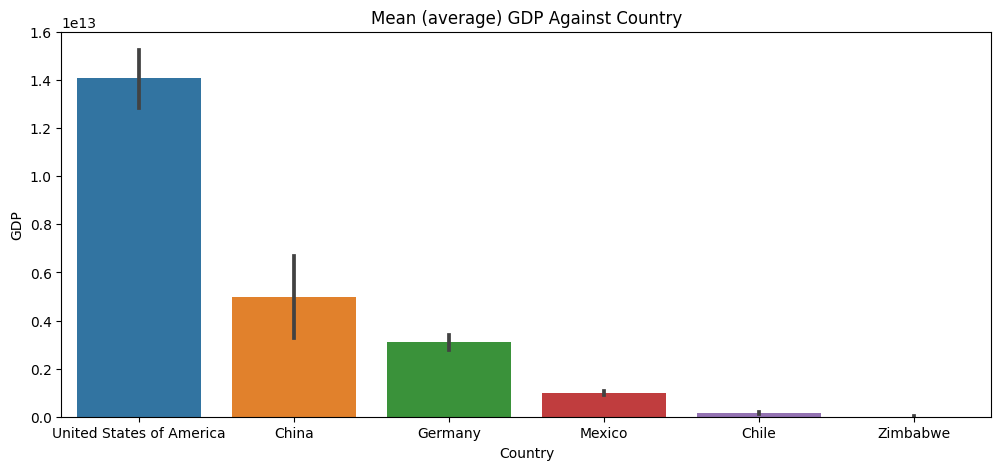

In [736]:
order = df.groupby("Country")["GDP"].sum().sort_values(ascending=False).index

plt.figure(figsize=(12, 5))
sns.barplot(x="Country",y="GDP",data=df, order=order)
plt.title("Mean (average) GDP Against Country")


Here, we see something rather interesting. It seems that the relative order of life expectancy is different from the order for GDP. Whereas the United States had the top spot in the average GDP, Chile and Germany pull ahead. This could mean that there are other factor besides GDP at play when determing how life expectancy at birth plays out. However, despite all of this, we can still see that, generally, the countries with the highest GDPs are ahead in terms of life expectancy than the ones with lower relative average GDP. Case in point is Mexico, Zimbabwe and China, whom lag behind the other "rich" countries.

Text(0.5, 1.0, 'Mean (average) Life Expectancy at Birth Against Country')

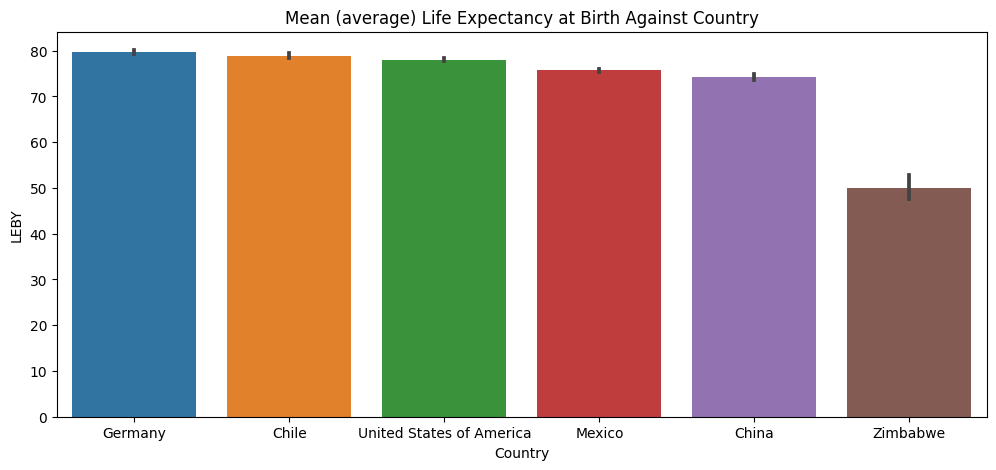

In [737]:
order = df.groupby("Country")["LEBY"].sum().sort_values(ascending=False).index

plt.figure(figsize=(12, 5))
sns.barplot(x="Country",y="LEBY",data=df, order=order)
plt.title("Mean (average) Life Expectancy at Birth Against Country")



# Three Variable Visualizations
Now we can examine the three variables (time, GDP, and Life Expectancy) in all in one plot. The scatter plot and pair plot is the optimal  method to showcase this.

Below, we can witness that genrally, there is a positive correleation between GDP and life expectancy over time. We can tell this by the hue of the plot points, which indicate that the chains along the top with high relative GDP seem to be the countries with generally high releative mean life expectancy. 

Another observation of note are that the countries along the bottom, who share relativley low GDP and Life Expectancy alike, seem to exhibit low relative slopes of their curves compard to the top perfomring ones. This could incidate that a postive and strong rate of growth, not simply the amount of GDP, can indictae whether a country will have a high relative life expectancy

<Axes: title={'center': 'GDP and Life Expectancy at birth (in years) Against Time'}, xlabel='Year', ylabel='GDP'>

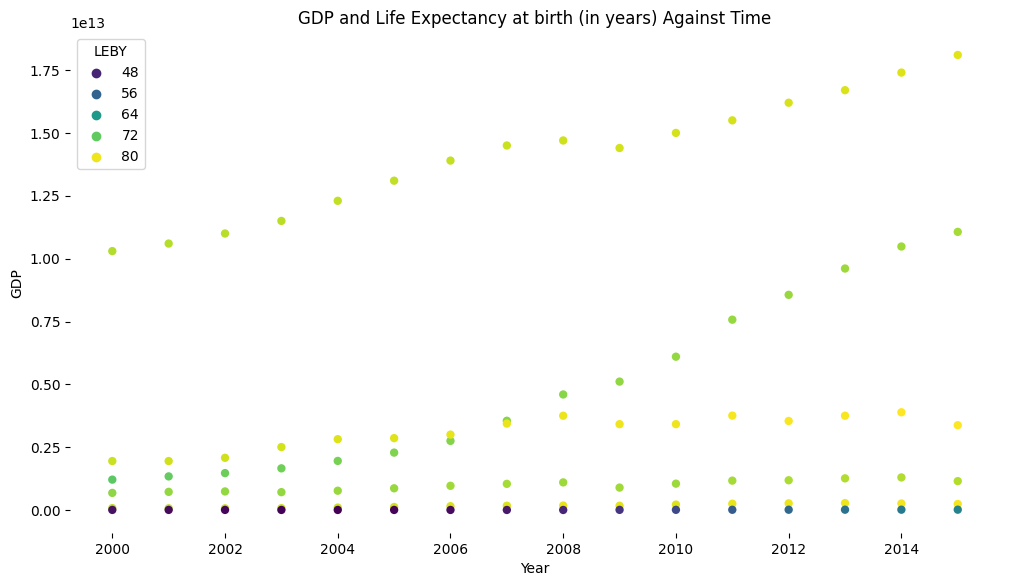

In [738]:
f, ax = plt.subplots(figsize=(12, 6.5))

sns.despine(f, left=True, bottom=True)

plt.title("GDP and Life Expectancy at birth (in years) Against Time")
sns.scatterplot(x="Year", y="GDP",
                hue="LEBY",
                palette="viridis",
                
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)


# Conclusions

- There is a positive correleation between GDP and Life Expectancy

- From 2000 to 2015, most countries share a positive trend towards Life Expectancy and GDP

- Relativley poor countries such as Zimbabwe with low GDPs are more likley to see a similiar relative amount of Life Expectancy

- Economic downturns/drops in GDP seem to roughly correleate with drops in life expectancy

- These findings backed up my expectations before starting, in that life expectancy is directly correleated with GDP.